https://github.com/eschnett/SPH.jl/blob/master/src/SPH.jl

In [6]:
using Base

## Simulation configuration datatype

In [7]:
struct simulationConfig
    endTime_::Float64
    deltaTime_::Float64
    
    particleRadius_::Float64
    influenceRadius_::Float64
    
    simulationConfig(endTime::Float64, deltaTime::Float64, particleRadius::Float64) = new(endTime, deltaTime, particleRadius, 6.1*particleRadius)
end

## Box domain datatype

In [8]:
struct boxDomain
    xMin_::Float64
    yMin_::Float64
    zMin_::Float64
    
    xMax_::Float64
    yMax_::Float64
    zMax_::Float64
end

## Particles datatype

In [9]:
mutable struct Particles
    size_::Int64
    posX_::Vector{Float64}
    posY_::Vector{Float64}
    posZ_::Vector{Float64}
    
    Particles() = new(0, Float64[],Float64[],Float64[])
end

function Base.resize!(p::Particles, size::Integer)
    p.size_ = size
    resize!(p.posX_, size)
    resize!(p.posY_, size)
    resize!(p.posZ_, size)
    
    return nothing
end

Particles(x::Int64) = (
                        p = Particles();
                        resize!(p,x);
                        return p;
                    )

methods(Particles)

# 2 methods for type constructor:
[1] Particles() in Main at In[9]:7
[2] Particles(x::Int64) in Main at In[9]:19

## Initialize Domain Function

In [38]:
function initialize(config::simulationConfig, domain::boxDomain)
    
    distX = domain.xMax_ - domain.xMin_
    distY = domain.yMax_ - domain.yMin_ 
    distZ = domain.zMax_ - domain.zMin_

    particleDiameter = 2*config.particleRadius_
    
    numParticleInX = Int64(round(distX / particleDiameter))
    numParticleInX = numParticleInX==0 ? 1 : numParticleInX
    
    numParticleInY = Int64(round(distY / particleDiameter))
    numParticleInY = numParticleInY==0 ? 1 : numParticleInY
    
    numParticleInZ = Int64(round(distZ / particleDiameter))
    numParticleInZ = numParticleInZ==0 ? 1 : numParticleInZ

    numParticles =numParticleInX *numParticleInY * numParticleInZ
    
    particles = Particles(numParticles)

    @inbounds for gk in 1 : numParticleInZ, gj in 1 : numParticleInY, gi in 1 : numParticleInX
                
            i = gi-1 + numParticleInX * (gj-1 + numParticleInY * (gk-1)) + 1   
        
            particles.posX_[i] = domain.xMin_ + config.particleRadius_ + (gi-1) * particleDiameter
            particles.posY_[i] = domain.yMin_ + config.particleRadius_ + (gj-1) * particleDiameter
            particles.posZ_[i] = domain.zMin_ + config.particleRadius_ + (gk-1) * particleDiameter
    end
    
    return particles
end

initialize (generic function with 1 method)

In [52]:
config = simulationConfig(0.5, 0.01, 0.025)

simulationConfig(0.5, 0.01, 0.025, 0.1525)

In [74]:
domain = boxDomain( 0.0, 0.0, 0.0,
                    +1.0, +1.0, +0.0)

boxDomain(0.0, 0.0, 0.0, 1.0, 1.0, 0.0)

In [75]:
particles = initialize(config, domain)

particles.size_

400

In [76]:
using Plots

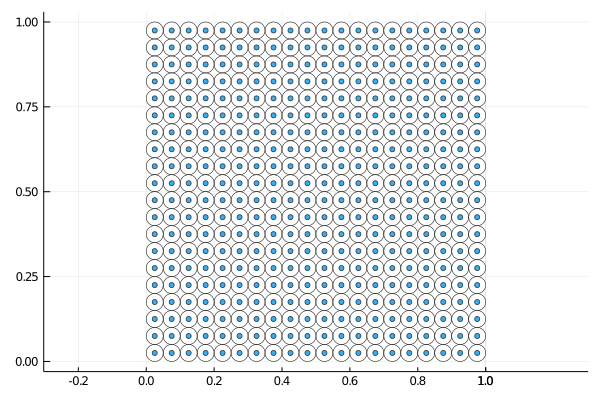

In [78]:
function circleShape(c1::Float64, c2::Float64, r::Float64)
    θ = collect(range(0.0, stop = 2*π, length = 50))
    return c1.+r*sin.(θ), c2.+r*cos.(θ)
end

plt3d = Plots.plot(particles.posX_, particles.posY_,
     seriestype=:scatter, markersize = 3)

for i in 1 : particles.size_
    Plots.plot!(circleShape(particles.posX_[i], particles.posY_[i], config.particleRadius_), seriestype=[:shape,], lw=0.5,c=:white,linecolor=:black,
    legend =false, fillalpha = 0.2, aspect_ratio=1)
end

display(plt3d)